In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows =500
pd.options.display.max_columns = 500

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("final_scout_dummy.csv")
df.head().T

,0,1,2,3,4
price,15770.000,14500.000,14640.000,14500.000,16790.000
km,56013.000,80000.000,83450.000,73000.000,16200.000
previous_owners,2.000,1.000,1.000,1.000,1.000
inspection_new,1.000,0.000,0.000,0.000,1.000
nr_of_doors,5.000,3.000,4.000,3.000,5.000
nr_of_seats,5.000,4.000,4.000,4.000,5.000
co2_emission,99.000,129.000,99.000,99.000,109.000
gears,7.000,7.000,7.000,6.000,7.000
age,3.000,2.000,3.000,3.000,3.000
hp_kW,66.000,141.000,85.000,66.000,66.000


In [4]:
X = df.drop(columns="price")
y = df["price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [6]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11139, 137)
Train target shape   :  (11139,)
Test features shape  :  (4775, 137)
Test target shape    :  (4775,)


In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),                          
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
        }
    
    return pd.DataFrame(scores)

In [11]:
y_pred = linear_model.predict(X_test_scaled)
y_train_pred = linear_model.predict(X_train_scaled)

In [12]:
lm = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
lm

,linear_train,linear_test
R2,0.895,0.885
mae,1668.085,1721.188
mse,5697137.052,6396984.751
rmse,2386.868,2529.226


In [13]:
from sklearn.linear_model import Ridge, RidgeCV

In [14]:
r_model = Ridge()
r_model.fit(X_train_scaled, y_train)

Ridge()

In [15]:
y_pred = r_model.predict(X_test_scaled)
y_train_pred = r_model.predict(X_train_scaled)

In [16]:
ridge = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge

,ridge_train,ridge_test
R2,0.895,0.885
mae,1668.379,1721.204
mse,5697881.653,6384462.291
rmse,2387.024,2526.749


In [17]:
model = RidgeCV(alphas = np.linspace(0.01,1,20), cv = 5, scoring= "neg_root_mean_squared_error")

In [18]:
model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [19]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [20]:
rcv = train_val(y_train, y_train_pred, y_test, y_pred, "ridgecv")
rcv

,ridgecv_train,ridgecv_test
R2,0.895,0.885
mae,1668.379,1721.204
mse,5697881.653,6384462.291
rmse,2387.024,2526.749


In [21]:
from sklearn.linear_model import LassoCV

In [22]:
model = LassoCV(alphas = np.linspace(0.01,1,20), cv = 5, random_state = 42, max_iter = 1000)

In [23]:
model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
        cv=5, random_state=42)

In [24]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [25]:
lassocv = train_val(y_train, y_train_pred, y_test, y_pred, "ridgecv")
lassocv

,ridgecv_train,ridgecv_test
R2,0.894,0.885
mae,1668.673,1720.386
mse,5703352.112,6392431.844
rmse,2388.169,2528.326


In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [27]:
elastic_model = ElasticNet(max_iter=1000, random_state=42)

In [28]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(random_state=42)

In [29]:
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [30]:
elasticnet = train_val(y_train, y_train_pred, y_test, y_pred, "ridgecv")
elasticnet

,ridgecv_train,ridgecv_test
R2,0.894,0.885
mae,1668.673,1720.386
mse,5703352.112,6392431.844
rmse,2388.169,2528.326


In [31]:
param_grid = {"alpha":np.linspace(0.01, 1, 20),
            "l1_ratio": np.linspace(0.1, 1, 10)}

In [32]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [33]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   1.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.7s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   1.1s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.7s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.9s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.2; total time=   0.9s
[CV] END ...........alpha=0.01, l1_ratio=0.30000000000000004; total time=   1.2s
[CV] END ...........alpha=0.01, l1_ratio=0.30

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [34]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [35]:
gcv = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gcv

,GridSearch_train,GridSearch_test
R2,0.894,0.885
mae,1668.673,1720.386
mse,5703352.112,6392431.844
rmse,2388.169,2528.326


In [36]:
compare_df = pd.concat([lm, ridge, rcv, lassocv, gcv], axis = 1).T
compare_df

,R2,mae,mse,rmse
linear_train,0.895,1668.085,5697137.052,2386.868
linear_test,0.885,1721.188,6396984.751,2529.226
ridge_train,0.895,1668.379,5697881.653,2387.024
ridge_test,0.885,1721.204,6384462.291,2526.749
ridgecv_train,0.895,1668.379,5697881.653,2387.024
ridgecv_test,0.885,1721.204,6384462.291,2526.749
ridgecv_train,0.894,1668.673,5703352.112,2388.169
ridgecv_test,0.885,1720.386,6392431.844,2528.326
GridSearch_train,0.894,1668.673,5703352.112,2388.169
GridSearch_test,0.885,1720.386,6392431.844,2528.326


In [37]:
r2_sort = compare_df.reset_index().sort_values(by="R2", ascending = False)
rmse_sort = compare_df.reset_index().sort_values(by="rmse")

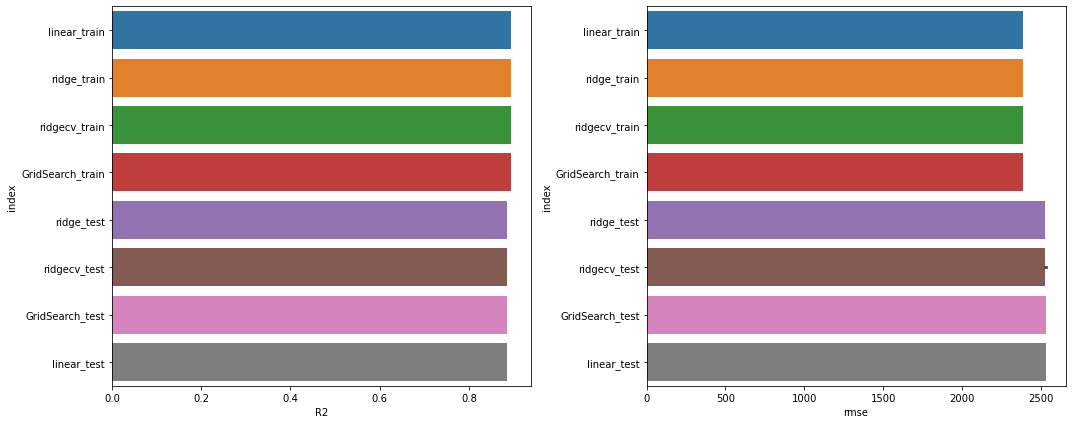

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.barplot(x = "R2", y = "index", data = r2_sort)

plt.subplot(122)
sns.barplot(x = "rmse", y = "index", data = rmse_sort)
plt.tight_layout();

In [39]:
# ridge model is the best model within these models.

In [40]:
from matplotlib import pyplot

In [41]:
ridge_coef_df = pd.DataFrame(r_model.coef_, X.columns, columns = ["ridge_coef"])
ridge_coef_df["ridge_coef"].sort_values()

fuel_benzine                               -3082.396
fuel_diesel                                -2578.672
make_model_Renault Clio                    -1793.302
make_model_Opel Corsa                      -1744.624
age                                        -1695.662
make_model_Opel Astra                      -1404.813
km                                         -1371.542
type_Used                                  -1273.323
type_Employee's car                         -696.247
type_Pre-registered                         -649.265
gearing_type_Manual                         -601.214
make_model_Renault Duster                   -559.005
weight_kg                                   -478.929
fuel_LPG                                    -382.628
co2_emission                                -379.926
make_model_Opel Insignia                    -323.131
drive_chain_front                           -300.804
type_New                                    -300.440
ss_Emergency system                         -2

In [42]:
#fuel_benzine                               -3082.396
#fuel_diesel                                -2578.672
#make_model_Renault Clio                    -1793.302
#make_model_Opel Corsa                      -1744.624
#age                                        -1695.662
#make_model_Opel Astra                      -1404.813
#km                                         -1371.542
#type_Used                                  -1273.323
#type_Employee's car                         -696.247
#type_Pre-registered                         -649.265
#gearing_type_Manual                         -601.214
#make_model_Renault Espace                   1093.393
#hp_kW                                       2502.119

# we can use them if we need to reduce the number of features. (fuel, hp_kW, make_model, age, km, type, gearing_type)

### XGBoost

In [66]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
from xgboost import XGBRegressor

In [45]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [46]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
km,56013.000,80000.000,83450.000,73000.000,16200.000
type,Used,Used,Used,Used,Used
previous_owners,2,1,1,1,1
inspection_new,1,0,0,0,1
paint_type,Metallic,Metallic,Metallic,Metallic,Metallic
nr_of_doors,5,3,4,3,5
nr_of_seats,5,4,4,4,5


In [47]:
X = df.drop(columns="price")
y= df.price

In [48]:
cat = X.select_dtypes("object").columns
cat

Index(['make_model', 'body_type', 'type', 'paint_type', 'gearing_type',
       'drive_chain', 'fuel', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security'],
      dtype='object')

In [49]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,make_model,body_type,km,type,previous_owners,inspection_new,paint_type,nr_of_doors,nr_of_seats,gearing_type,drive_chain,fuel,co2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kW,warranty_months,displacement_cc,weight_kg,cons_comb
0,0.000,4.000,56013.000,4.000,2,1,0.000,5,5,0.000,1.000,3.000,99.000,2.000,841.000,171.000,244.000,3124.000,7.000,3,66.000,12,1422.000,1220.000,3.800
1,0.000,4.000,80000.000,4.000,1,0,0.000,3,4,0.000,1.000,2.000,129.000,2.000,4696.000,172.000,493.000,2613.000,7.000,2,141.000,12,1798.000,1255.000,5.600
2,0.000,4.000,83450.000,4.000,1,0,0.000,4,4,0.000,1.000,3.000,99.000,2.000,5010.000,320.000,529.000,3264.000,7.000,3,85.000,12,1598.000,1225.000,3.800
3,0.000,4.000,73000.000,4.000,1,0,0.000,3,4,0.000,1.000,3.000,99.000,2.000,5978.000,46.000,504.000,1487.000,6.000,3,66.000,12,1422.000,1195.000,3.800
4,0.000,4.000,16200.000,4.000,1,1,0.000,5,5,0.000,1.000,3.000,109.000,2.000,2408.000,47.000,471.000,3608.000,7.000,3,66.000,12,1422.000,1195.000,4.100


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [51]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11139, 25)
Train target shape   :  (11139,)
Test features shape  :  (4775, 25)
Test target shape    :  (4775,)


In [52]:
xgb_model = XGBRegressor(random_state=42, objective="reg:squarederror")

In [53]:
xgb_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=42)

In [67]:
xgb = eval_metric(xgb_model, X_train, y_train, X_test, y_test)
xgb

,train,test
R2,0.933,0.923
mae,1297.967,1364.316
mse,3631869.730,4289423.437
rmse,1905.747,2071.092


In [55]:
param_grid = {"n_estimators":[700, 850, 1000],'max_depth':[9,11,13], "learning_rate": [0.05, 0.1],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [56]:
grid_model = GridSearchCV(estimator=xgb_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [59]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [9, 11, 13],
                         'n_estimators': [700, 850, 1000],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [60]:
grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 9,
 'n_estimators': 1000,
 'subsample': 0.5}

In [63]:
df_f_i = pd.DataFrame(index=X.columns, data = xgb_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance",ascending=False)
df_f_i

,Feature Importance
hp_kW,0.302
age,0.156
gears,0.138
warranty_months,0.133
make_model,0.064
km,0.048
weight_kg,0.032
displacement_cc,0.024
type,0.023
gearing_type,0.018


In [64]:
model = XGBRegressor(random_state=42, objective="reg:squarederror",learning_rate=0.05, max_dept=9, subsample=0.5, n_estimators=1000, colsample_bytree=0.5)
model.fit(X_train, y_train)

XGBRegressor(colsample_bytree=0.5, learning_rate=0.05, max_dept=9,
             n_estimators=1000, objective='reg:squarederror', random_state=42,
             subsample=0.5)

In [65]:
gridxgb_fi = pd.DataFrame(index=X.columns, data = model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance",ascending=False)
gridxgb_fi

,Feature Importance
gears,0.232
age,0.173
hp_kW,0.143
make_model,0.096
warranty_months,0.066
displacement_cc,0.047
weight_kg,0.044
km,0.041
gearing_type,0.035
type,0.030


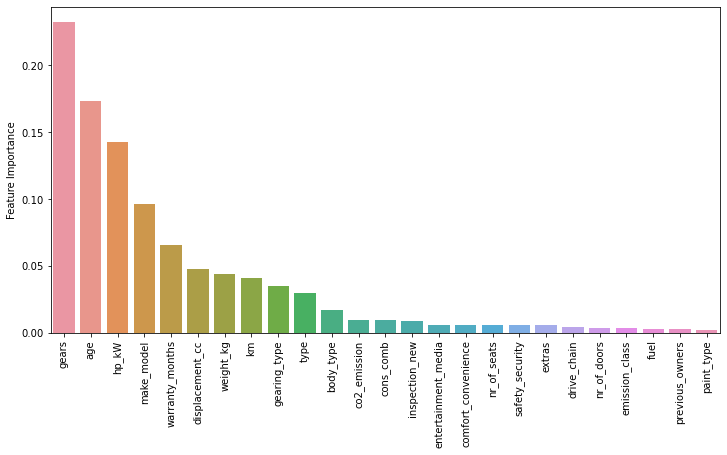

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(data=gridxgb_fi, x=gridxgb_fi.index, y='Feature Importance')

plt.xticks(rotation=90);

In [ ]:
# (fuel, make_model, age, km, type, gearing_type, hp_kW) >> for linear model.
# (gears, age, hp_kW, make_model, warranty_months, displacement_cc, weight_kg, km, gearing_type, type) >> for xgb model.

In [68]:
gcv = eval_metric(model, X_train, y_train, X_test, y_test)

In [76]:
pd.concat([compare_df.T, xgb, gcv], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,ridgecv_train,ridgecv_test,ridgecv_train,ridgecv_test,GridSearch_train,GridSearch_test,train,test,train,test
R2,0.895,0.885,0.895,0.885,0.895,0.885,0.894,0.885,0.894,0.885,0.933,0.923,0.962,0.945
mae,1668.085,1721.188,1668.379,1721.204,1668.379,1721.204,1668.673,1720.386,1668.673,1720.386,1297.967,1364.316,1000.430,1140.917
mse,5697137.052,6396984.751,5697881.653,6384462.291,5697881.653,6384462.291,5703352.112,6392431.844,5703352.112,6392431.844,3631869.730,4289423.437,2053591.399,3055608.565
rmse,2386.868,2529.226,2387.024,2526.749,2387.024,2526.749,2388.169,2528.326,2388.169,2528.326,1905.747,2071.092,1433.036,1748.030


In [ ]:
# according to rmse, the best model is xgb gridsearch.

In [78]:
import pickle

In [79]:
pickle.dump(model, open("xgbmodel_autoscout", 'wb'))

In [80]:
pickle.dump(linear_model, open("linmodel_autoscout", 'wb'))